In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [2]:
## randomized search
num_models = 1
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()

    param_grid = {
        "d_ff": [128, 256],
        "Nx": [4, 6],
        "n_head": [2],
        "dropout": [0.1, 0.25, 0.5],
        "lr": [7.5*10**-4, 2.5*10**-4]
    }
    config["tgt_step"] = k-1

    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = None, n_epoch = 60, param_grid = param_grid, n_iter=24)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"param.json", "w") as outfile: 
    json.dump({"params": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/24 [00:00<?, ?it/s]

hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.1, lr: 0.00025, 


  4%|▍         | 1/24 [1:11:40<27:28:40, 4300.88s/it]

Scores: 35230.51, 30184.58, 23337.78, 27482.48; avg score: 29058.84
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00075, 


  8%|▊         | 2/24 [2:22:59<26:12:10, 4287.73s/it]

Scores: 33977.80, 29759.23, 22622.75, 27232.55; avg score: 28398.08
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.25, lr: 0.00075, 


 12%|█▎        | 3/24 [3:34:01<24:56:40, 4276.20s/it]

Scores: 34647.34, 29321.19, 22248.73, 26073.77; avg score: 28072.76
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00075, 


 17%|█▋        | 4/24 [4:45:26<23:46:27, 4279.36s/it]

Scores: 34634.75, 29503.05, 23059.52, 26823.94; avg score: 28505.31
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.5, lr: 0.00025, 


 21%|██        | 5/24 [6:27:55<26:08:38, 4953.59s/it]

Scores: 34841.45, 30416.20, 23440.95, 27515.67; avg score: 29053.57
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.1, lr: 0.00025, 


 25%|██▌       | 6/24 [8:11:23<26:54:02, 5380.17s/it]

Scores: 35535.36, 30410.97, 22810.68, 27802.70; avg score: 29139.93
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.5, lr: 0.00075, 


 29%|██▉       | 7/24 [9:54:08<26:37:04, 5636.75s/it]

Scores: 33933.40, 29665.65, 21832.25, 26213.59; avg score: 27911.22
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.25, lr: 0.00025, 


 33%|███▎      | 8/24 [11:36:26<25:45:41, 5796.35s/it]

Scores: 35081.90, 29379.05, 22293.68, 26353.61; avg score: 28277.06
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00025, 


 38%|███▊      | 9/24 [12:48:06<22:12:11, 5328.73s/it]

Scores: 35307.09, 30392.65, 22057.97, 27535.59; avg score: 28823.33
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.1, lr: 0.00025, 


 42%|████▏     | 10/24 [13:59:45<19:29:09, 5010.71s/it]

Scores: 35769.66, 30080.39, 23108.61, 26362.71; avg score: 28830.34
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.25, lr: 0.00025, 


 46%|████▌     | 11/24 [15:11:35<17:19:12, 4796.36s/it]

Scores: 35224.69, 29972.13, 22721.42, 26781.96; avg score: 28675.05
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.5, lr: 0.00025, 


 50%|█████     | 12/24 [16:23:01<15:28:11, 4640.96s/it]

Scores: 34796.55, 30525.39, 23323.71, 27142.48; avg score: 28947.03
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.1, lr: 0.00025, 


 54%|█████▍    | 13/24 [18:05:03<15:33:04, 5089.51s/it]

Scores: 35465.85, 30569.31, 22964.12, 26408.29; avg score: 28851.89
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.1, lr: 0.00075, 


 58%|█████▊    | 14/24 [19:16:42<13:28:27, 4850.78s/it]

Scores: 34635.10, 29260.90, 22643.91, 25961.70; avg score: 28125.40
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.1, lr: 0.00075, 


 62%|██████▎   | 15/24 [20:59:26<13:07:00, 5246.67s/it]

Scores: 34658.04, 28828.02, 23163.08, 26244.89; avg score: 28223.51
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.1, lr: 0.00075, 


 67%|██████▋   | 16/24 [22:11:29<11:02:29, 4968.73s/it]

Scores: 34999.79, 29366.77, 22470.88, 25936.56; avg score: 28193.50
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.5, lr: 0.00075, 


 71%|███████   | 17/24 [23:54:14<10:21:38, 5328.40s/it]

Scores: 34797.29, 28995.65, 23306.59, 26094.12; avg score: 28298.41
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.25, lr: 0.00025, 


 75%|███████▌  | 18/24 [25:36:39<9:17:22, 5573.82s/it] 

Scores: 34876.94, 30335.49, 22573.25, 26573.69; avg score: 28589.84
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.5, lr: 0.00025, 


 79%|███████▉  | 19/24 [27:18:42<7:58:13, 5738.61s/it]

Scores: 34743.46, 30772.83, 23661.93, 26666.04; avg score: 28961.06
--------------------
hyperparams: d_ff: 128, Nx: 4, n_head: 2, dropout: 0.25, lr: 0.00025, 


 83%|████████▎ | 20/24 [28:30:13<5:53:36, 5304.07s/it]

Scores: 35248.09, 29999.71, 23024.20, 26244.48; avg score: 28629.12
--------------------
hyperparams: d_ff: 256, Nx: 6, n_head: 2, dropout: 0.25, lr: 0.00075, 


 88%|████████▊ | 21/24 [30:12:48<4:37:58, 5559.60s/it]

Scores: 33757.94, 28643.88, 21838.26, 25957.91; avg score: 27549.50
--------------------
hyperparams: d_ff: 256, Nx: 4, n_head: 2, dropout: 0.25, lr: 0.00075, 


 92%|█████████▏| 22/24 [31:24:26<2:52:42, 5181.02s/it]

Scores: 34217.57, 28836.37, 22338.24, 26209.88; avg score: 27900.51
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.25, lr: 0.00075, 


 96%|█████████▌| 23/24 [33:07:00<1:31:12, 5472.78s/it]

Scores: 34253.18, 28503.49, 22039.16, 25664.75; avg score: 27615.15
--------------------
hyperparams: d_ff: 128, Nx: 6, n_head: 2, dropout: 0.1, lr: 0.00075, 


100%|██████████| 24/24 [34:49:26<00:00, 5223.60s/it]  

Scores: 34248.69, 29123.03, 22136.86, 25779.48; avg score: 27822.02
--------------------
Best params: {'d_ff': 256, 'Nx': 6, 'n_head': 2, 'dropout': 0.25, 'lr': 0.00075}
----------------------------------------


In [5]:
best_params

{'d_ff': 256, 'Nx': 6, 'n_head': 2, 'dropout': 0.25, 'lr': 0.00075}

In [2]:
best_model_params = {'d_ff': 256, 'Nx': 6, 'n_head': 2, 'dropout': 0.25, 'lr': 0.00075}

In [ ]:
## Multiple model training
cfg = get_config()
num_models0 = 1
num_models1 = 1

for k in range(num_models0, num_models1+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = f'49'
    cfg['num_epochs'] = 51

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in best_params.keys():
        cfg[param_name] = best_params[param_name]

    model, summary = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

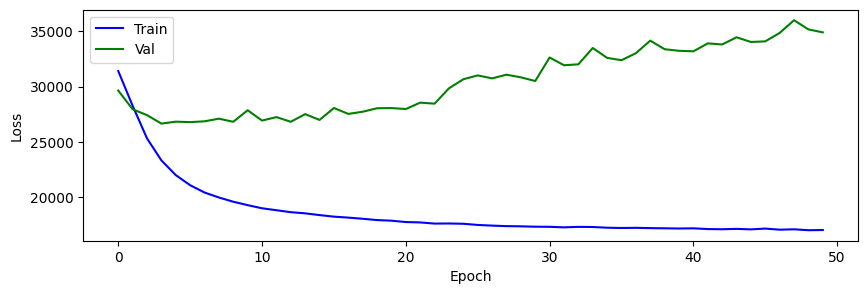

In [9]:
inference_helpers.arrange_figures_in_rows(n_rows=1, prefix="final_")